In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import calendar
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel

pd.options.display.max_columns = None
pd.options.display.max_rows = None

warnings.filterwarnings('ignore')

os.chdir("E:/Trinity/Dissertation/Sem 3/models/data/")

Read the new DataFrame

In [20]:
os.chdir("E:/Trinity/Dissertation/Sem 3/models/")
df = pd.read_csv("hourly_details(2).csv")  

In [21]:
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y')

In [22]:
df["DayOfWeek"] = (df["Date"].dt.dayofweek + 1) # to range between 1 and 7 instead of 0-6
# 1=Monday, 2=Tuesday, 3=Wednesday

In [23]:
df["Weekend?"] = ((df["DayOfWeek"]==6) | (df["DayOfWeek"]==7)).astype(int)

In [24]:
# https://www.google.com/search?q=holidays+in+ireland+2019&oq=
# holidays+in+ireland+2019&aqs=chrome..69i57j0l6j69i60.5066j0j4&sourceid=chrome&ie=UTF-8

df["isHoliday?"] = ((df["Date"] == '2019-01-01') | (df["Date"] == '2019-03-18') | (df["Date"] == '2019-04-22') | (df["Date"] == '2019-05-06') | (df["Date"] == '2019-06-03') | (df["Date"] == '2019-08-05') | (df["Date"] == '2019-10-28') | (df["Date"] == '2019-01-01') | (df["Date"] == '2019-12-25') | (df["Date"] == '2019-12-26')).astype(int)


In [25]:
df["StartTime"] = df["StartTime"].str[11:13].astype(int)
df["EndTime"] = df["EndTime"].str[11:13].astype(int)

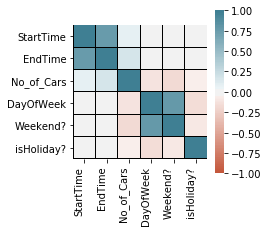

In [26]:
plt.figure(figsize=(3,3))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=0.01, 
    linecolor='black',
    #annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [27]:
df["Month"] = pd.DatetimeIndex(df['Date']).month
df["Day"] = pd.DatetimeIndex(df['Date']).day
df["Year"] = pd.DatetimeIndex(df['Date']).year


In [11]:
#df = df.drop(["Date"], axis=1)

In [11]:
# Function to implement Target Encoding
def calc_smooth_mean(df, by, on, m):
    mean = df[on].mean()                                 # Compute the global mean
    agg = df.groupby(by)[on].agg(['count', 'mean'])      # Compute number of values & mean of each group
    counts = agg['count']
    means = agg['mean']

    smooth = (counts * means + m * mean) / (counts + m)  # Compute the "smoothed" means
    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [28]:
df["Tolls"] = df["Tollname"]
df = pd.get_dummies(df, columns=["Tollname"], drop_first = True)

#### df_backup = df.copy()

In [29]:
df = df[df["Year"] == 2019]

In [30]:
cols_to_norm = ['Month','Day']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [31]:
df.head(10)

,Date,StartTime,EndTime,No_of_Cars,DayOfWeek,Weekend?,isHoliday?,Month,Day,Year,Tolls,Tollname_Dublin Tunnel,Tollname_Eastlink,Tollname_Limerick Tunnel,Tollname_M1,Tollname_M3,Tollname_M4,Tollname_M50,Tollname_M7-M8,Tollname_M8,Tollname_N25,Tollname_N6
1344,2019-01-01,0,1,22,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0
1345,2019-01-01,1,2,29,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0
1346,2019-01-01,2,3,25,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0
1347,2019-01-01,3,4,31,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0
1348,2019-01-01,4,5,24,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0
1349,2019-01-01,5,6,19,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0
1350,2019-01-01,6,7,38,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0
1351,2019-01-01,7,8,49,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0
1352,2019-01-01,8,9,79,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0
1353,2019-01-01,9,10,108,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0


### MODEL

In [20]:
# day of week ois important
# not keep isHoliday ---- 141.49
# keep isHoliday ---- 141.08
# Hyper parameter tuning ---- 141.06
df_x = df.drop(["No_of_Cars","Year"],axis=1)
df_y = df["No_of_Cars"]

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.8, random_state=100)

In [17]:
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=1000, random_state=100)

# From rf_random.best_estimator_
rf = RandomForestRegressor(bootstrap=True, 
                           ccp_alpha=0.0, 
                           criterion='mse', 
                           max_depth=100, 
                           max_features='auto', 
                           max_leaf_nodes=None, 
                           max_samples=None, 
                           min_impurity_decrease=0.0, 
                           min_impurity_split=None, 
                           min_samples_leaf=1, 
                           min_samples_split=2, 
                           min_weight_fraction_leaf=0.0, 
                           n_estimators=800, 
                           n_jobs=None, 
                           oob_score=False, 
                           random_state=100, 
                           verbose=0, 
                           warm_start=False)

In [18]:
model = rf.fit(x_train, y_train)        # Fit the RFR mode

NameError: name 'x_train' is not defined

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
ypred = model.predict(x_test)

In [25]:
import math

mse = mean_squared_error(y_test, ypred)
rmse = math.sqrt(mse)
rmse

111.98523271767301

In [ ]:
data = pd.DataFrame(ypred, y_test).reset_index()

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(data[0].head(50))
plt.plot(data["No_of_Cars"].head(50))

plt.show()

### Hyperparameter Tuning

In [ ]:
rf = RandomForestRegressor(random_state = 100)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=100, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

rf_random.best_params = {'bootstrap': True,
                         'max_depth': 100,
                         'max_features': 'auto',
                         'min_samples_leaf': 1,
                         'min_samples_split': 2,
                         'n_estimators': 800}


rf_random.best_estimator_ = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [26]:
df.head()

,StartTime,EndTime,No_of_Cars,DayOfWeek,Weekend?,isHoliday?,Month,Day,Year,Tollname_Dublin Tunnel,Tollname_Eastlink,Tollname_Limerick Tunnel,Tollname_M1,Tollname_M3,Tollname_M4,Tollname_M50,Tollname_M7-M8,Tollname_M8,Tollname_N25,Tollname_N6
1344,0,1,22,2,0,1,-1.552307,-1.676356,2019,0,0,0,0,0,0,0,1,0,0,0
1345,1,2,29,2,0,1,-1.552307,-1.676356,2019,0,0,0,0,0,0,0,1,0,0,0
1346,2,3,25,2,0,1,-1.552307,-1.676356,2019,0,0,0,0,0,0,0,1,0,0,0
1347,3,4,31,2,0,1,-1.552307,-1.676356,2019,0,0,0,0,0,0,0,1,0,0,0
1348,4,5,24,2,0,1,-1.552307,-1.676356,2019,0,0,0,0,0,0,0,1,0,0,0


In [32]:
df.to_csv("HourlyDetails (Unboosted).csv", index=False)

In [14]:
len(df)

94392